In [ ]:
import gzip
import json
from config import DATASET_PATH

# Read dataset from the file
f = gzip.open(DATASET_PATH, "r")
# Process the lines into a preliminary dictionary
full_dataset = [json.loads(line) for line in f.readlines()]
f.close()

In [65]:
import gzip
import json
from config import BIGRAM_DATASET_PATH
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from autocorrect import Speller

spell = Speller(lang='en')
depth = 1000
# depth = len(lines)

# Read dataset from the file
f = gzip.open(BIGRAM_DATASET_PATH, "r")
# Process the lines into a preliminary dictionary
body = f.read().decode('utf8')
lines = body.splitlines()
f.close()
raw = [{}]*len(lines)
for i in range(1, depth):
    bigrams = lines[i].split(" ")
    raw[i] = {}
    for bigram in bigrams:
            try:
                colon = bigram.index(":")
                key = bigram[:colon]
                words = key.split("_")
                key = "_".join([spell(word) for word in words])
                if not any(str.isdigit(c) for c in key):
                    raw[i][key] = bigram[colon + 1:]
            except:
                continue
labels = []
lineDicts = []
for line in raw:
    try:
        labels.append(float(line["#label#"]))
        del line["#label#"]
        lineDicts.append(line)
    except KeyError:
        continue

print(len(labels))
print(len(lineDicts))

lineStrings = []
for i in range(0, len(lineDicts)):
    linestr = ""
    for key, value in lineDicts[i].items():
        linestr += ((key + " ")*int(value))
    lineStrings.append(linestr)

print(len(lineStrings))

tfidf_vectorizer = TfidfVectorizer()
bag_of_words = tfidf_vectorizer.fit_transform(lineStrings)
feature_names = tfidf_vectorizer.get_feature_names()
features = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

999
999
999


C:\Users\emmet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from data_processing import clean_dataset

# process the data (lemmatize, feature generation)
features, labels = clean_dataset(full_dataset, 5000)

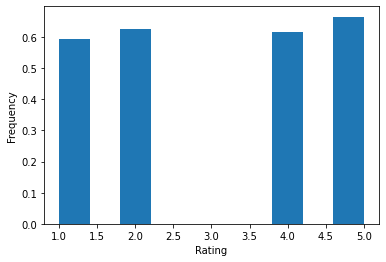

In [67]:
import matplotlib.pyplot as plt 
# Visualize the ratings distribution
plt.hist(labels, density=True, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.show()

In [53]:
# Feature array
print(features.head())

    _a  _advice  _although  _and  _articles  _as  _ascending  _ballantine  \
0  0.0      0.0        0.0   0.0   0.000000  0.0         0.0          0.0   
1  0.0      0.0        0.0   0.0   0.000000  0.0         0.0          0.0   
2  0.0      0.0        0.0   0.0   0.000000  0.0         0.0          0.0   
3  0.0      0.0        0.0   0.0   0.000000  0.0         0.0          0.0   
4  0.0      0.0        0.0   0.0   0.035599  0.0         0.0          0.0   

   _because  _billion  ...  your_heart  your_library  your_own  \
0       0.0  0.000000  ...         0.0           0.0       0.0   
1       0.0  0.000000  ...         0.0           0.0       0.0   
2       0.0  0.000000  ...         0.0           0.0       0.0   
3       0.0  0.000000  ...         0.0           0.0       0.0   
4       0.0  0.035599  ...         0.0           0.0       0.0   

   your_programming  your_strategic  your_time  your_usual  yourself  \
0               0.0             0.0        0.0         0.0       0.0

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import importlib
import config
importlib.reload(config)
from config import PALETTE

def visualize_confusion_matrix(confusion):
    sns.heatmap(confusion, annot = True, cmap=PALETTE, fmt="g")
    plt.xlabel("Predicted Class")
    plt.ylabel("True class")
    plt.show()

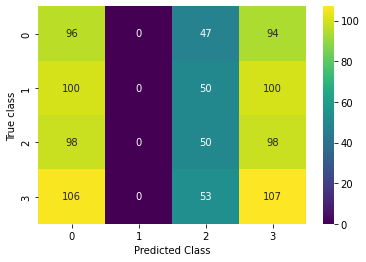

0.25325325325325326


In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

y_pred = cross_val_predict(SVC(class_weight="balanced", C=0.05), features, labels, cv = 5)
visualize_confusion_matrix(confusion_matrix(labels, y_pred))
print(accuracy_score(labels, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=3, weights="distance"), features, labels, cv = 5)
visualize_confusion_matrix(confusion_matrix(labels, y_pred))
print(accuracy_score(labels, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB

y_pred = cross_val_predict(GaussianNB(), features, labels, cv = 5)
visualize_confusion_matrix(confusion_matrix(labels, y_pred))
print(accuracy_score(labels, y_pred))